In [36]:
import datetime
from matplotlib.dates import HourLocator, DateFormatter

import matplotlib.pyplot as plt
import numpy as np
from utils.plot import plot
from utils.analyze import load_data
%matplotlib inline

In [17]:
directory = "agglomerat2"
numbers = range(1,15)

In [19]:
x, y, z, T, t, settings = load_data(directory, numbers)
x = x[0]
y = y[0]

In [18]:
def cat1d(x):
    x_flat = [xi.flatten() for xi in x]
    return np.concatenate(x_flat)

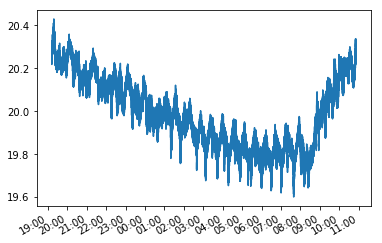

In [37]:
dt = np.array([[datetime.datetime.fromtimestamp(tii) for tii in ti] for ti in t])
plt.plot(cat1d(dt[:10]), cat1d(T[:10]))
plt.gca().xaxis.set_major_locator(HourLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter("%H:%M"))
plt.gcf().autofmt_xdate()

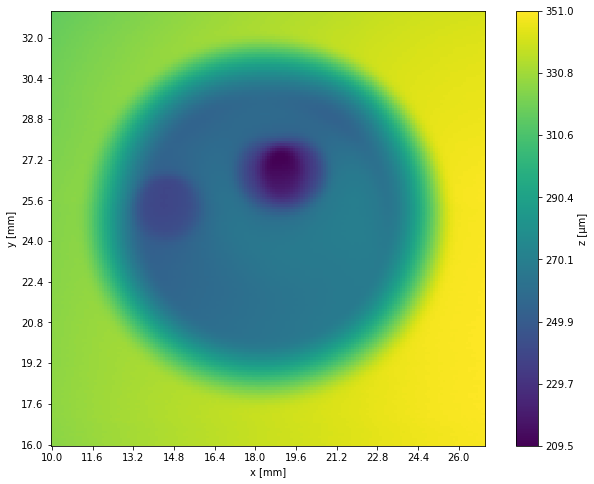

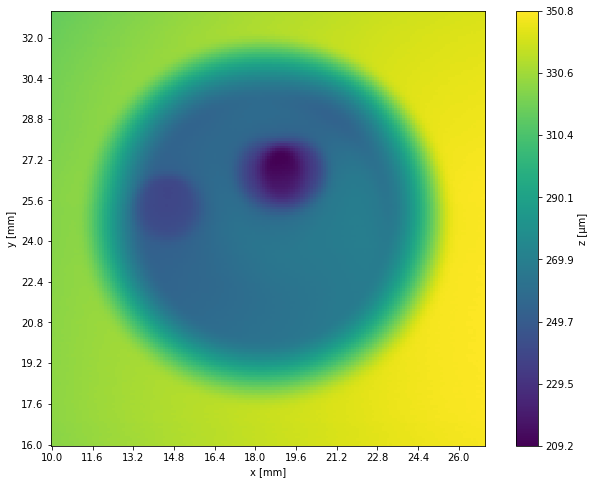

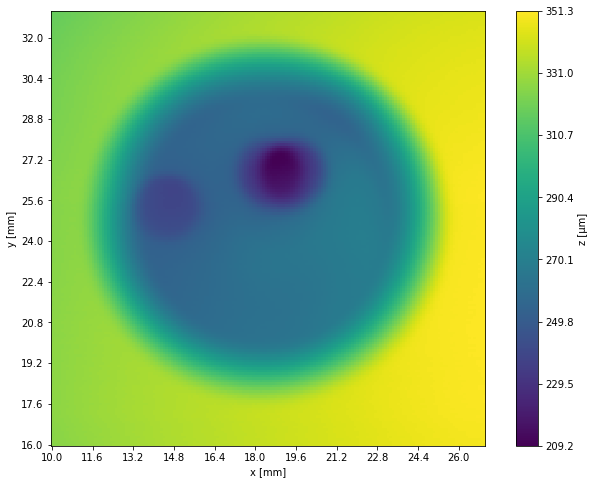

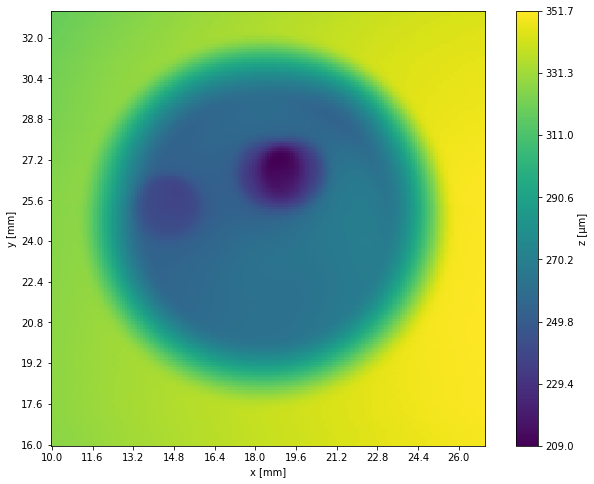

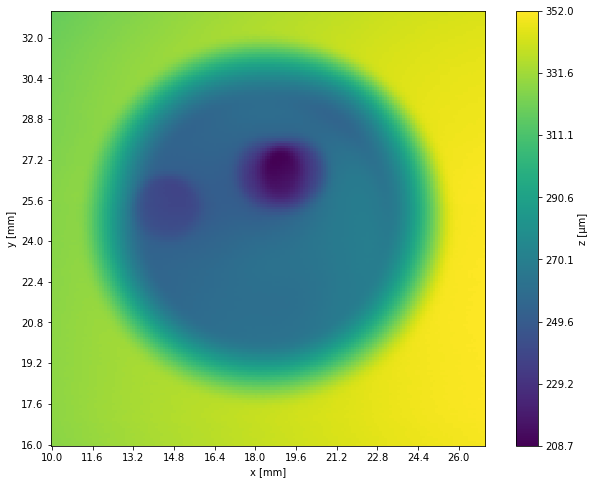

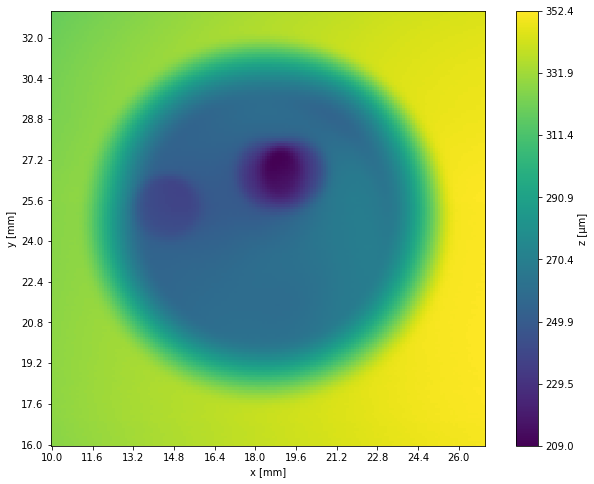

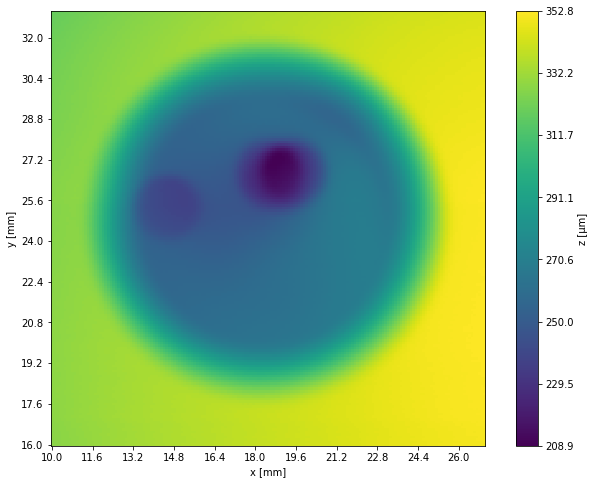

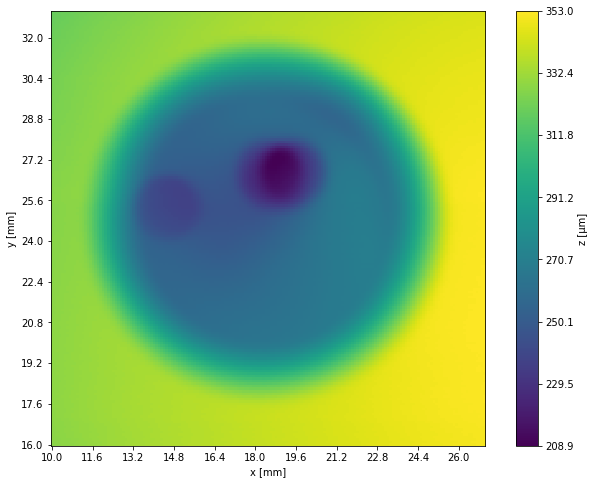

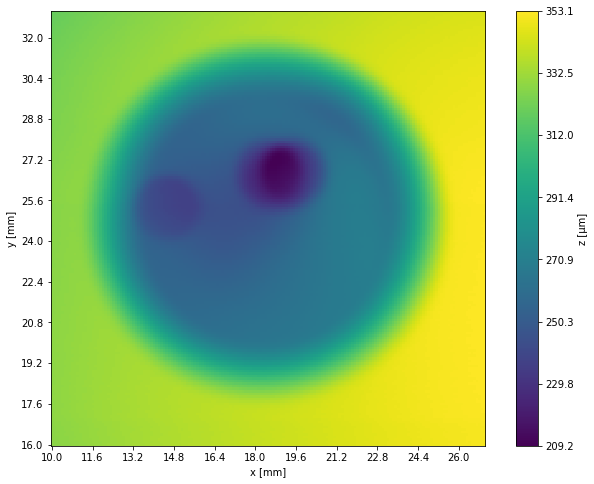

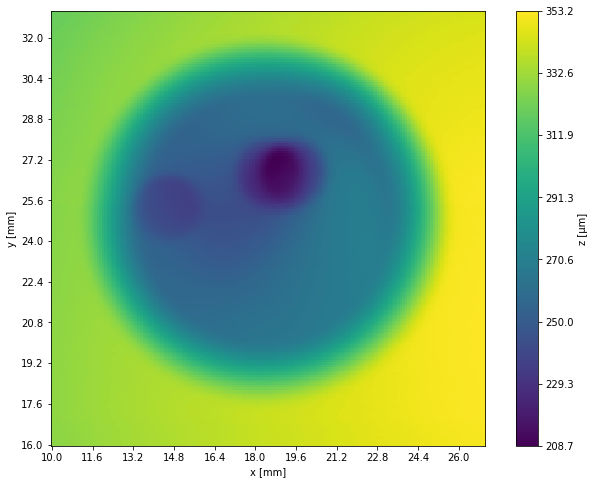

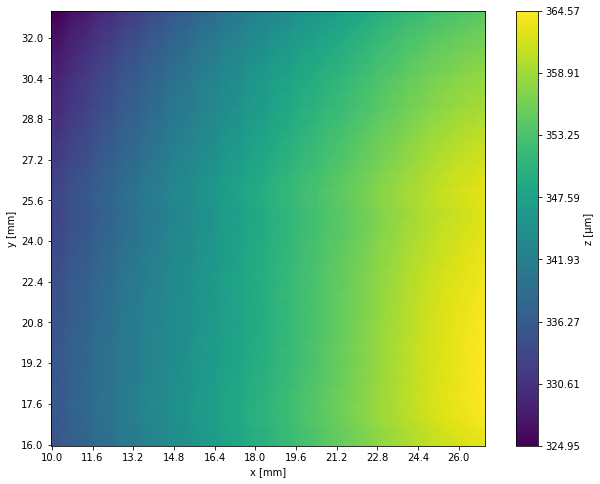

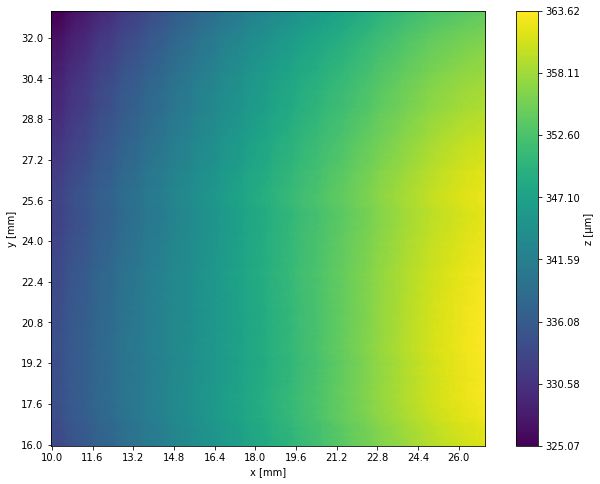

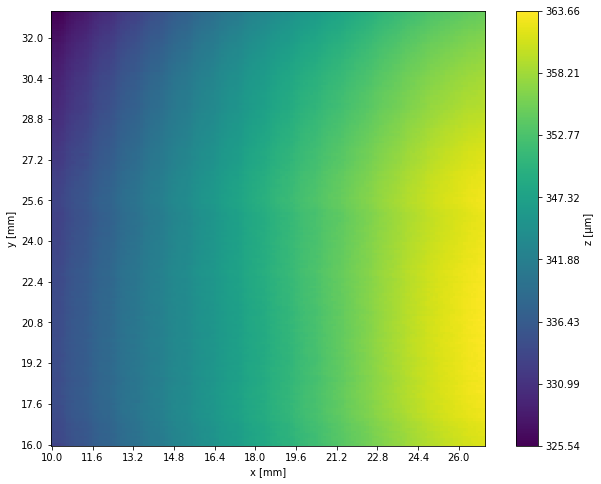

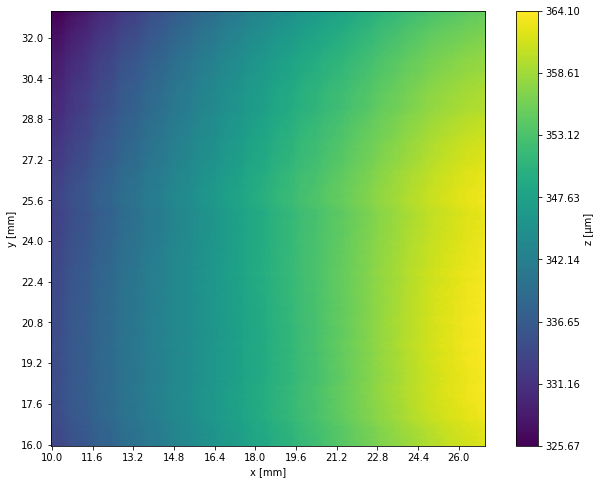

In [38]:
for zi in z:
    plot(x, y, zi[0])

22.4185809147


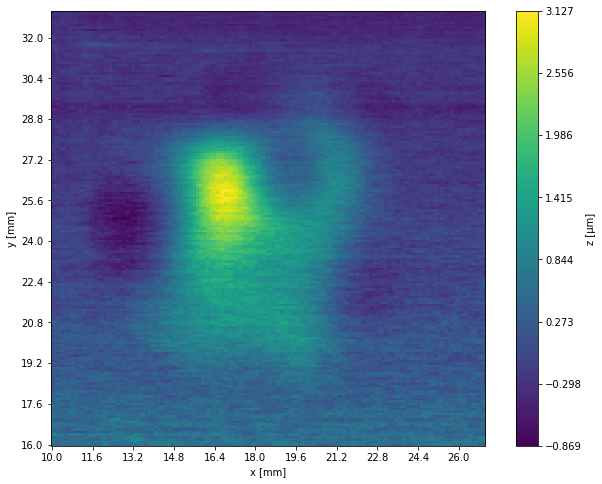

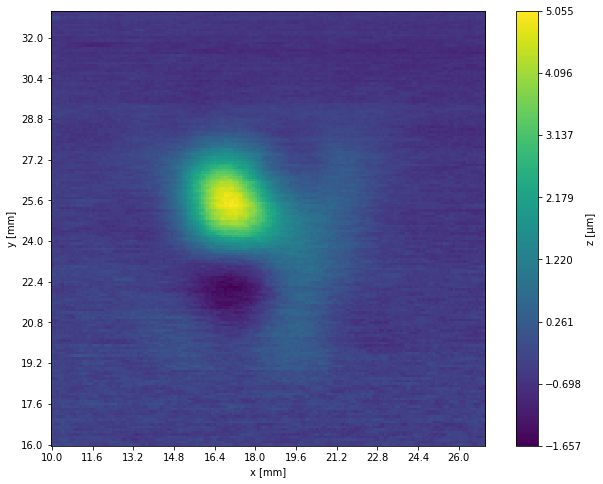

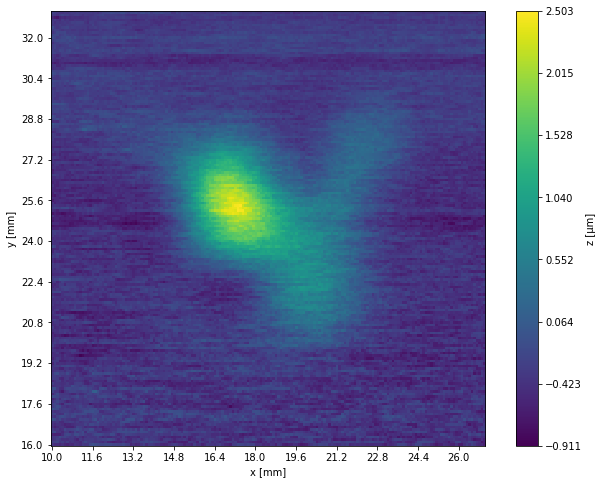

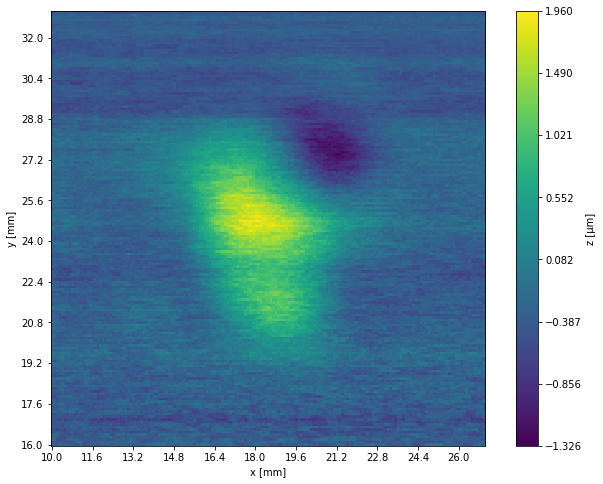

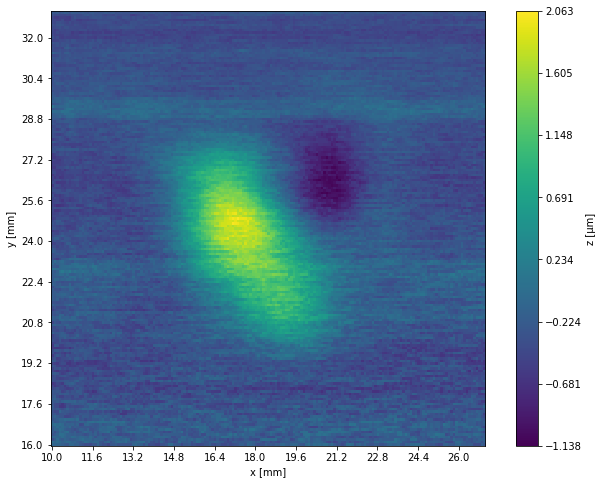

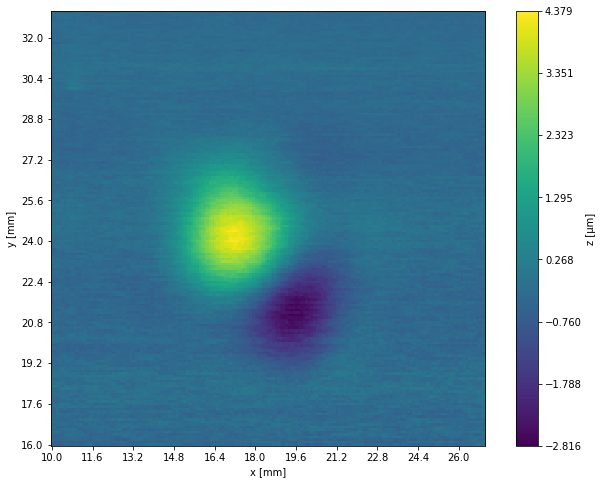

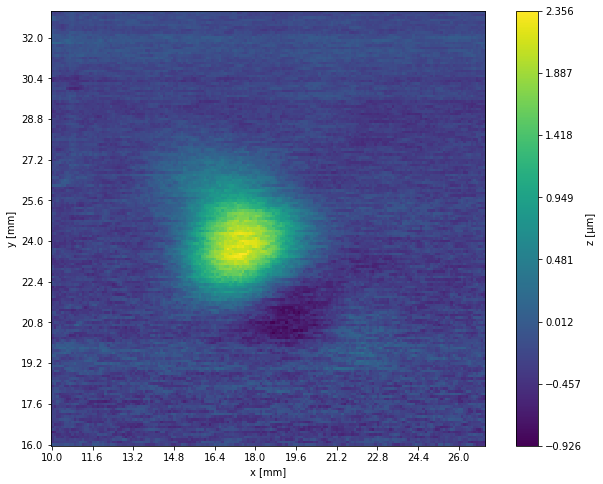

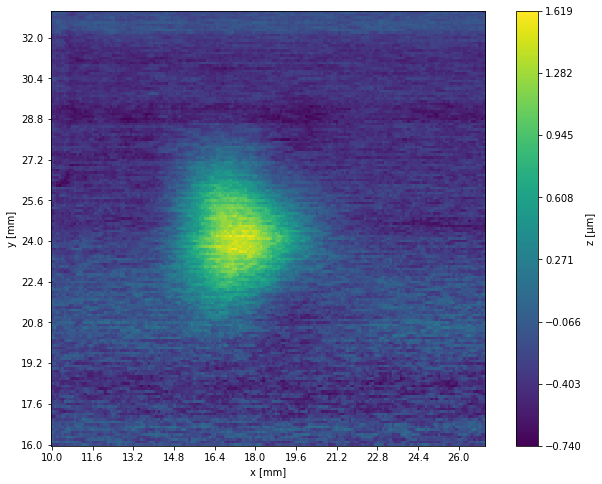

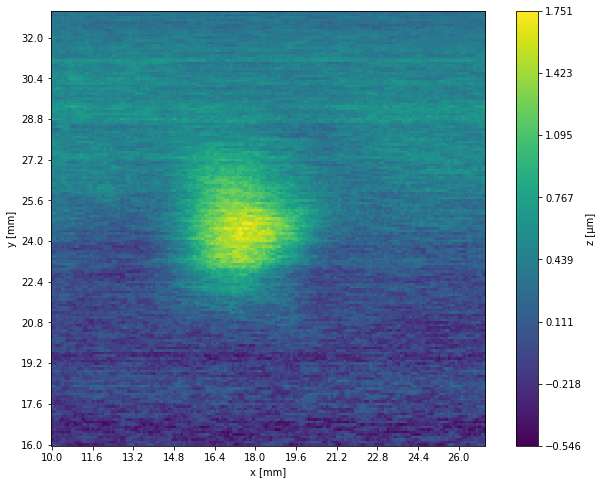

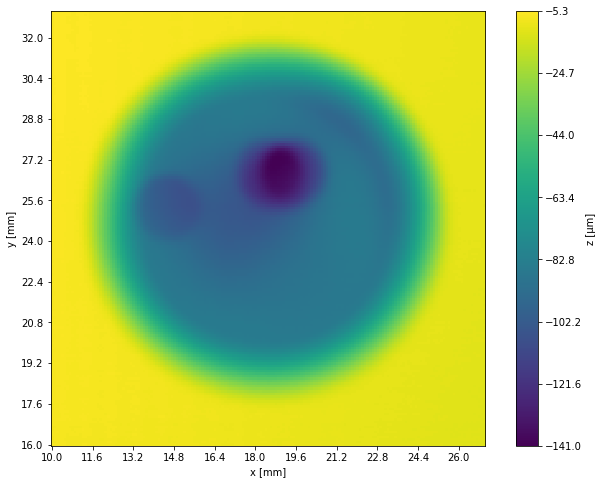

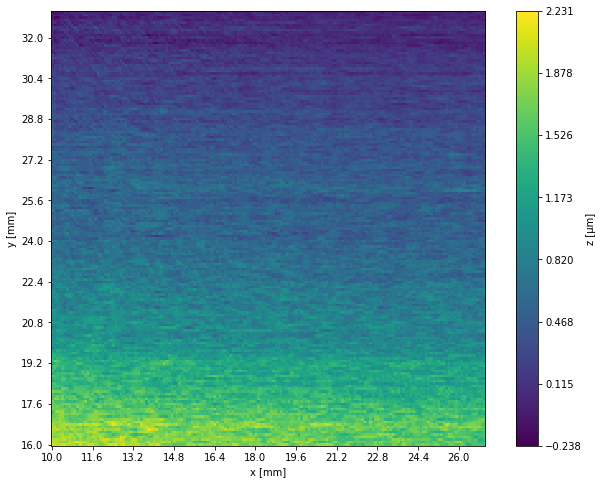

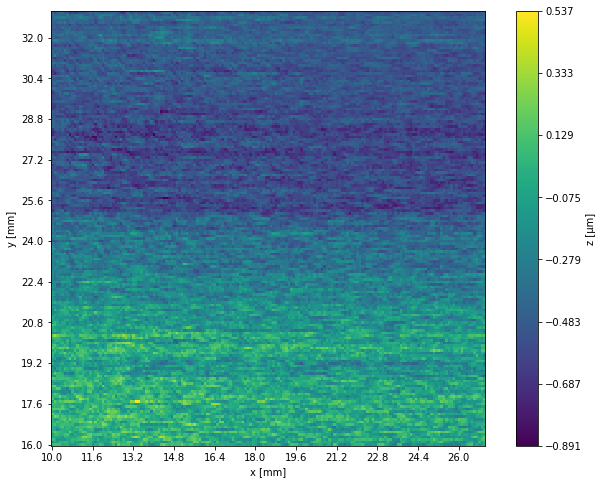

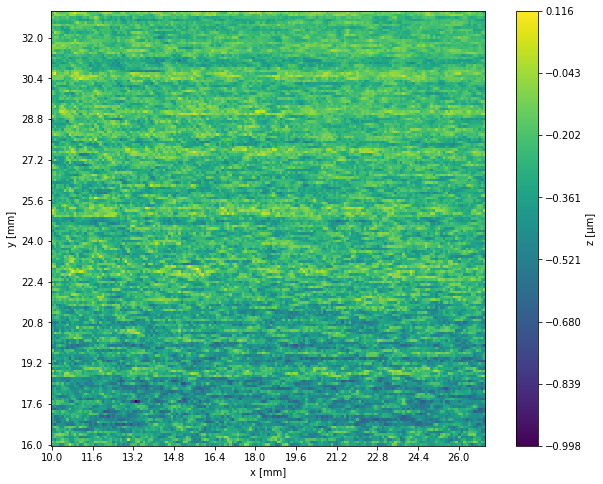

In [21]:
s = 0
for zi, zj in zip(z, z[1:]):
    d = zi[0] - zj[0]
    s += d.max()
    plot(x, y, zi[0] - zj[0])
print(s)

(<matplotlib.figure.Figure at 0x7f398fc63b70>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f398fdaf6a0>)

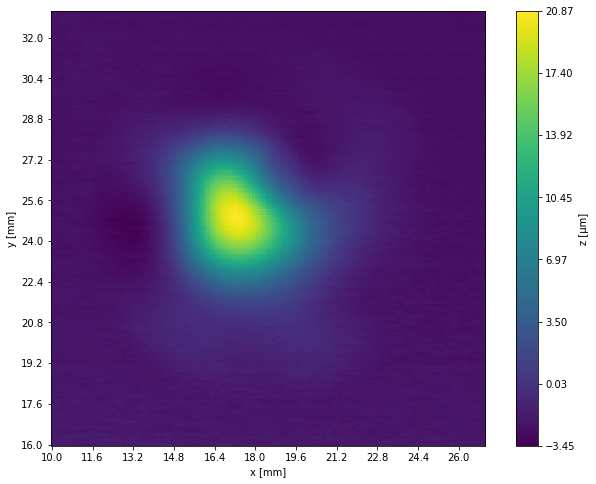

In [23]:
plot(x, y, z[0][0] - z[9][0])